# Regressão Linear

Nessa aula, iremos tratar dos seguintes conteúdos:
- Introdução a Regressões
- Regressão Linear Simples
- Métricas de Regressões
- Regressão Linear Múltipla
- Regressão Polinomial

## Introdução a Regressões

A regressão tem por objetivo explicar a associação de variáveis quantitativas, sendo sempre uma delas a variável do objetivo do estudo, aqui chamada de **dependente**, pois veremos que o seu valor dependerá de outras informações, chamadas de **variáveis independentes**, das quais ao menos uma precisa ser também quantitativa.

<img src = "../imgs/reg_lin_pontos.png" width = "30%"></img>

O intuito do modelo de regressão linear é definirmos uma reta que melhor se ajusta aos dados.

<img src = "../imgs/reg_lin_explicacao.png" width = "30%"></img>

A seguir veremos casos de Regressão Linear Simples, Múltipla e Polinomial:

## Regressão Linear Simples

Na regressão linear simples, temos o modelo como: $Y \approx \beta_0 + \beta_1 X$

- $Y$ é a variável dependente, pois é escrita em função de variável $X$
- $X$ é a variável independente, pois a partir dela chegaremos em valores estimados de $Y$, também denotado por $\hat{Y}$
- $\beta_0$ é chamado de **intercepto** pois define o valor que intercepta o eixo $y$ quando $x = 0$. Muitas vezes pode ser interpretado como o valor mínimo associado ao determinado experimento.
- $\beta_1$ é chamado de **coeficiente angular**, ou ainda, **coeficiente de proporcionalidade**, pois define a qual taxa as variáveis $X$ e $Y$ se relacionam.

A questão agora é, como encontramos os valores de $\tilde{\beta}$?

## Métodos de Estimação de Parâmetros
### Propriedades esperadas

<img src = "../imgs/vies.png" width = "50%"></img>

- A: não-viesado, pouco acurado e baixa precisão
- B: viesado, pouco acurado e baixa precisão
- C: não-viesado, muito acurada e boa precisão
- D: viesada, pouco acurada e alta precisão

Queremos sempre um BLUE - Best Linear unbiased estimator

Melhor reta que não seja enviesada 

### OLS ou Mínimos Quadrados Ordinários
Um dos procedimentos mais usados para obter estimadores é aquele que se baseia no princípio dos mínimos quadrados, introduzido por Gauss em 1794, mas que primeiro apareceu com esse nome no apêndice do tratado de Legendre, Nouvelles Méthodes pour la Determination des Orbites des Comètes, publicado em Paris em 1806. Gauss somente viria a publicar seus resultados em 1809, em Hamburgo. Ambos utilizaram o princípio em conexão com problemas de Astronomia e Física.

Um engenheiro está estudando a resistência Y de uma fibra em função de seu diâmetro X e notou que as variáveis são aproximadamente proporcionais, isto é, elas obedecem à relação

$$Y  = \beta_0 + \beta_1X$$

em que $\beta_0$ representa o valor mínimo de resistência e $\beta_1$ é o coeficiente de proporcionalidade. Agora ele deseja estimar estes parâmetros baseado numa amostra colhida por meio de mensuração e testes. Dessa maneira podemos falar que o valor esperado de Y depende de X de tal forma que

$$E(Y|X) = \beta_0 + \beta_1X$$

pois os valores reais não se ajustam perfeitamente, ou seja

$$Y_i  = \hat{\beta}_0 + \hat{\beta}_1X_i + \epsilon_i$$

isto significa que

$$\epsilon_i = Y_i  - (\beta_0 + \beta_1X_i) = Y_i - E(Y_i|X_i) $$

<img src = "../imgs/reg_lin_erro.png" width = "80%"></img>

Como os erros podem ser positivos e negativos, e lembrando que a soma da diferença da média é sempre zero, o que queremos é minimizar a soma dos erros quadráticos, isto é:

$$Z = ||\epsilon||^2 = \sum_{i=1}^n\epsilon_i^2 = \sum_{i=1}^n[Y_i - E(Y_i)]^2 = \sum_{i=1}^n[Y_i - \beta_0 - \beta_1X_i]^2$$

Derivando parcialmente com relação a cada parâmetro $\beta$, igualando a zero e resolvendo o sistema de equações, chegamos que

$$
\large
\begin{cases}
\hat{\beta}_1=\frac{\sum_{i=1}^n (x_i- \bar{x})(y_i - \bar{y})}{\sum_{i=1}^n (x_i - \bar{x})^2} = \frac{\sigma_{xy}}{\sigma_{xx}} = \frac{covar(x, y)}{var(x)}\\
\hat{\beta}_0= \bar{y}-\hat{\beta_1}\bar{x}
\end{cases}
$$

### Máxima Verossimilhança

A função de verossimilhança é definida por:

$$L(\theta; \tilde{x}) = \prod_{i=1}^nf(x_i;\theta)$$

Neste caso queremos encontrar o valor mais verossímil de $\theta$, ou seja, queremos encontrar qual $\theta$ que maximiza essa função e portanto fazemos

$$\dfrac{\partial L(\theta; \tilde{x})}{\partial \theta} = 0$$

porém muitas vezes é mais fácil encontrar a log-verossimlhança, ou seja
$$\dfrac{\partial log(L(\theta; \tilde{x}))}{\partial \theta} = \dfrac{\partial l(\theta; \tilde{x})}{\partial \theta}= 0$$

pois

$$l(\theta; \tilde{x}) = log(L(\theta; \tilde{x})) = log(\prod_{i=1}^n f(x_i;\theta)) = \sum_{i=1}^n log(f(x_i;\theta))$$


#### Exemplo 1

In [2]:
#Import das bibliotecas necessárias
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
import statsmodels.formula.api as smf

In [3]:
#read dataset
ds = pd.read_csv('./data/Salary_Data.csv')

In [4]:
ds

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [9]:
#ols stats
reg_lin = smf.ols('Salary ~ YearsExperience', ds).fit()
reg_lin

In [10]:
# Série de medidas - Mínimos quadrados 
# importante R-squared = melhor mais próximo de 1
# log-likelihood =  vera semelhança 
# squared = ao quadrado

# x = 0 , y = 25k
# aumento médio de 

reg_lin.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Wed, 03 Nov 2021   Prob (F-statistic):           1.14e-20
Time:                        20:22:01   Log-Likelihood:                -301.44
No. Observations:                  30   AIC:                             606.9
Df Residuals:                      28   BIC:                             609.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        2.579e+04   2273.053     11.347      0.000    2.11e+04    3.04e+04
YearsExperience  9449.9623    378.755     24.950      0.000    8674.119    1.02e+04
==============================================================================
Omnibus:                        2.140   Durbin-Watson:                   1.648
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                1.569
Skew:                           0.363   Prob(JB):                        0.456
Kurtosis:                       2.147   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Métricas de Regressões

Alguma das métricas que podemos utilizar para quantificar a acurácia do modelo, usamos por exemplo raiz quadrada da média dos erros quadráticos RMSE (*root mean squared error*), erro quadrático médio MSE (*mean squared error*) e o erro absoluto médio MAE (*mean absolute error*):<br><br>
$$
RMSE = \sqrt{\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}
$$

$$
MSE = {\frac{1}{n}\sum_{i=1}^n (y_i-\hat{y}_i)^2}
$$

$$
MAE = {\frac{1}{n}\sum_{i=1}^n |y_i-\hat{y}_i|}
$$

Outra medida importante é o **coeficiente de determinação $R^2$**, que mede a proporção da variabilidade em Y que pode ser explicada a partir de X.

$$R^2 = 1-\frac{\sum_{i=1}^n (y_i-\hat{y}_i)^2}{\sum_{i=1}^n(y_i-\bar{y})^2}, \quad 0\leq R^2\leq 1$$

Entretanto essa é uma medida que precisa ser olhada com cautela dado que sempre aumenta a medida que incluímos variáveis no modelos, independentemente de explicar ou não a variável. Além disso ela pode aumentar ou diminuir de acordo com a amplitude de X.

Portanto surge o **coeficiente de determinação ajustado $\overline{R}^2$** dado por:

$$1-\dfrac{n-1}{n-2}(1-R^2)$$

#### Exemplo 2

[[ 1.5]
 [10.3]
 [ 4.1]
 [ 3.9]
 [ 9.5]
 [ 8.7]
 [ 9.6]
 [ 4. ]
 [ 5.3]
 [ 7.9]]
[ 37731. 122391.  57081.  63218. 116969. 109431. 112635.  55794.  83088.
 101302.]


<function matplotlib.pyplot.show(close=None, block=None)>

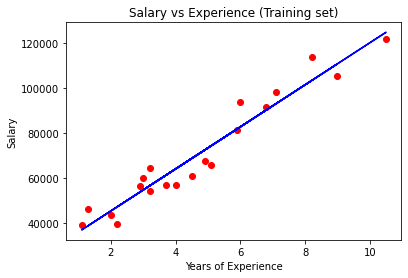

In [37]:
# Boas praticas para dividir os dados, treinar e testar o conjunto de dados

# Importing the dataset
X = ds.iloc[:, :-1].values
y = ds.iloc[:, 1].values
#print(X)
#print(y)

# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1/3, random_state=0)

#print(X_train)
#print(X_test)

#print(y_train)
#print(y_test)

# Fitting Simple Linear Regression to the Training set
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()
regressor.fit(X_train, y_train)

# Predicting the Test set results
#regressor.predict(np.array([1]).reshape(1,-1))
y_pred = regressor.predict(X_test)

print(X_test)
print(y_test)

# Visualising the Training set results
plt.scatter(X_train, y_train, color = 'red')
plt.plot(X_train, regressor.predict(X_train), color='blue')
plt.title('Salary vs Experience (Training set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show


<function matplotlib.pyplot.show(close=None, block=None)>

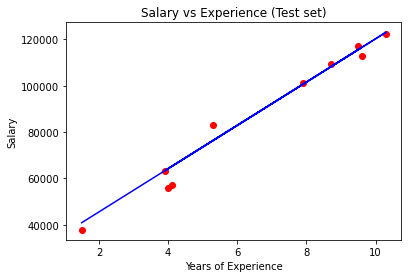

In [38]:
# Visualising the Test set results
plt.scatter(X_test, y_test, color = 'red')
plt.plot(X_test, regressor.predict(X_test), color='blue')
plt.title('Salary vs Experience (Test set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show


In [ ]:
#metrics

### <font color = red>Pressuposições **NECESSÁRIAS**</font>

- A relação entre Y e X é **linear**
- Os valores de X são fixos (ou controlados)
- A média do erro é nula, isto é, $E(\epsilon_i) = 0$
- É necessário haver **homocedasticidade de variância**, ou seja, para cada valor de X, a variância do erro $\epsilon_i$ é sempre $\sigma^2$. O que implica que $Var(Y_i) = \sigma^2$
- O erro de uma observação é independente do erro de outra observação, ou seja:
$$cov(\epsilon_i, \epsilon_i') = 0$$
- Os erros têm distribuição normal (necessário para testes de hipóteses e determinação de intervalo de confiânça)
$$\epsilon \sim N(0, \sigma^2$$

Logo

$$Y\sim N(\beta_0 + \beta_1X, \sigma^2)$$

## Regressão Linear Múltipla

Na regressão linear múltipla, temos o modelo como: $Y = \beta_0 + \beta_1 X_1  + \beta_2 X_2 + ... + \beta_n X_n$

#### Exemplo 3

Para o exemplo de Regressão Linear Múltipla, iremos utilizar o dataset *Car_Prices.csv*, onde o objetivo é estimar o preço dos carros a partir de suas características.

In [15]:
import pandas as pd

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [6]:
#Carregando o CSV
cars = pd.read_csv('./data/CarPrice.csv')
cars.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [7]:
# Algumas estatísticas interessantes sobre o dataset
cars.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [18]:
# Por curiosidade, vamos ver como está os valores desses carros
cars[['CarName', 'price']].sort_values(['price'],ascending=False)

,CarName,price
74,buick regal sport coupe (turbo),45400.000
16,bmw x5,41315.000
73,buick century special,40960.000
128,porsche boxter,37028.000
17,bmw x3,36880.000
49,jaguar xk,36000.000
48,jaguar xf,35550.000
72,buick skylark,35056.000
71,buick opel isuzu deluxe,34184.000
127,porsche cayenne,34028.000


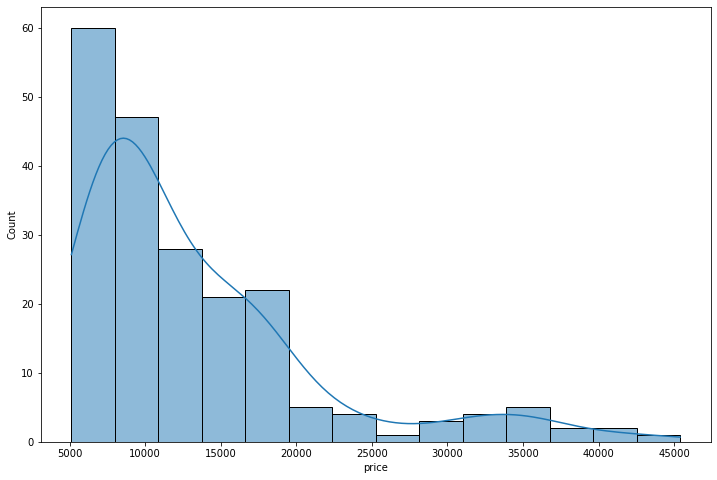

In [8]:
plt.figure(figsize=(12,8))
sns.histplot(cars["price"], kde=True)
plt.show()

In [20]:
#Olhando os tipos de variáveis que temos na base
cars.dtypes

car_ID                int64
symboling             int64
CarName              object
fueltype             object
aspiration           object
doornumber           object
carbody              object
wheelbase           float64
carlength           float64
carwidth            float64
carheight           float64
curbweight            int64
cylindernumber       object
enginesize            int64
boreratio           float64
stroke              float64
compressionratio    float64
horsepower            int64
peakrpm               int64
citympg               int64
highwaympg            int64
price               float64
dtype: object

In [21]:
# Features categóricas ou em forma de string
cars[['CarName', 'fueltype', 'aspiration', 'doornumber', 'carbody', 'cylindernumber']].head(100)

,CarName,fueltype,aspiration,doornumber,carbody,cylindernumber
0,alfa-romero giulia,gas,std,two,convertible,four
1,alfa-romero stelvio,gas,std,two,convertible,four
2,alfa-romero Quadrifoglio,gas,std,two,hatchback,six
3,audi 100 ls,gas,std,four,sedan,four
4,audi 100ls,gas,std,four,sedan,five
5,audi fox,gas,std,two,sedan,five
6,audi 100ls,gas,std,four,sedan,five
7,audi 5000,gas,std,four,wagon,five
8,audi 4000,gas,turbo,four,sedan,five
9,audi 5000s (diesel),gas,turbo,two,hatchback,five


Importante levantar que a regressão linear, seja ela simples ou múltipla, só suporta valores númericos. Dessa forma devemos tratar os dados categóricos da nossa base. Para isso vamos utilizar a função [get_dummies](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.get_dummies.html), onde esta função transforma as variáveis categóricas em diversas colunas no DataFrame para cada uma das opções de categoria:

In [22]:
cars_with_dummies = pd.get_dummies(cars, prefix_sep='_', columns=['fueltype', 
                                                                  'aspiration', 
                                                                  'doornumber', 
                                                                  'carbody', 
                                                                  'cylindernumber'])

In [23]:
# Vamos dar uma olhada no que aconteceu com a base
cars_with_dummies.head()

,car_ID,symboling,CarName,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,fueltype_diesel,fueltype_gas,aspiration_std,aspiration_turbo,doornumber_four,doornumber_two,carbody_convertible,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,cylindernumber_eight,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two
0,1,3,alfa-romero giulia,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495.0,0,1,1,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0
1,2,3,alfa-romero stelvio,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500.0,0,1,1,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0
2,3,1,alfa-romero Quadrifoglio,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500.0,0,1,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0
3,4,2,audi 100 ls,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950.0,0,1,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0
4,5,2,audi 100ls,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450.0,0,1,1,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0


Preparado a base, primeiro passo **importante** para podermos usar os dados no modelo é separar o dados em base de treino e teste (ou em alguns casos validação), onde a divisão fica da seguinte forma:
- **X :** todos os dados dispovínel sobre a dado que utilizamos exceto a resposta;
- **y :** Variável de resposta da nossa base.

In [24]:
X = cars_with_dummies.drop(['car_ID', 'CarName', 'price'], axis = 1)
y = cars_with_dummies['price']

Vamos utilizar para a separação da base em treino e teste a função [train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html), onde os parâmetros da função que mais iremos utlizar são:
- **test_size:** Defini a porcentagem que será separada para a base de teste;
- **random_state:** Seed de aleatoriadade, para garantir a reprodutibilidade.

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 42)

Para o caso da Regressão Linear Múltipla, iremos utilizar a biblioteca do Scikit-Learn chamada [LinearRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html?highlight=linearregression#sklearn.linear_model.LinearRegression):

In [27]:
from sklearn.linear_model import LinearRegression

In [28]:
# Instancia o modelo
linreg = LinearRegression()

In [29]:
# Fit dos dados (ou seja, vamos passar os dados para o modelo aprender com eles)
linreg.fit(X_train, y_train)

LinearRegression()

In [30]:
# Para os dados novos, vamos definir a predição para a base de teste
y_pred = linreg.predict(X_test)

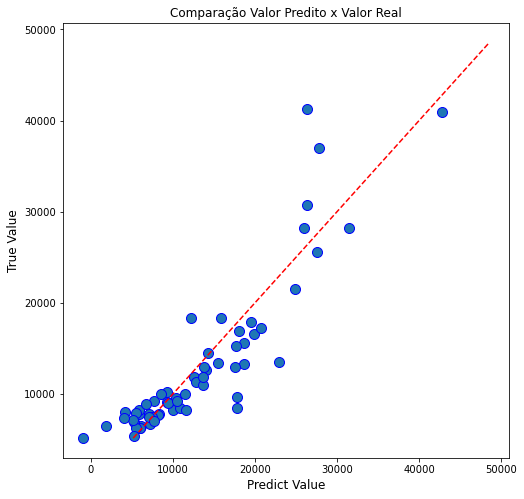

In [31]:
# Vamos criar um gráfico para comparar os Valores Reais com os Preditos
fig = plt.figure(figsize=(8,8))
l = plt.plot(y_pred, y_test, 'bo')
plt.setp(l, markersize=10)
plt.setp(l, markerfacecolor='C0')
plt.title('Comparação Valor Predito x Valor Real', fontsize=12)
plt.ylabel("True Value", fontsize=12)
plt.xlabel("Predict Value", fontsize=12)

# mostra os valores preditos e originais
xl = np.arange(min(y_test), 1.2*max(y_test),(max(y_test)-min(y_test))/10)
yl = xl
plt.plot(xl, yl, 'r--')

plt.show()

Vamos calcular o R2 para o modelo, importando a métrica [r2_score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html) diretamente do Scikit_Learn.

In [32]:
from sklearn.metrics import r2_score
R2 = r2_score(y_test, y_pred)
print('R2:', R2)

R2: 0.7887070326808494


Algo interessante que podemos fazer com o modelo é definir quais variáveis são as mais relevantes na hora da predição dos valores, ou seja quais variáveis têm maiores coeficientes. Esse processo é muito recorrente em Machine Learning e é chamado de **Feature Importance**.

In [34]:
coefs = linreg.coef_

list_columns = X_train.columns
list_feature = []
list_score = []

for i, v in enumerate(coefs):
    list_feature.append(list_columns[i])
    list_score.append(v)

dictionary = {'Features': list_feature,
              'Scores': list_score}

df_features = pd.DataFrame(dictionary)
df_features = df_features.sort_values(by=['Scores'], ascending=False)
df_features.reset_index(inplace=True, drop=True)
#df_features.head(10)
df_features

,Features,Scores
0,cylindernumber_two,7369.032276
1,fueltype_gas,4869.520458
2,carbody_hardtop,3846.580665
3,cylindernumber_five,2710.436392
4,carbody_convertible,1927.927570
5,cylindernumber_eight,1441.383102
6,aspiration_turbo,1115.204313
7,compressionratio,783.655423
8,carwidth,451.577851
9,carheight,194.409467


## 

## Regressão Polinomial

Notem que o modelo não precisa ter termos lineares em X, mas apenas nos parâmetros necessitam ser lineares. Por exemplo, modelo abaixo ainda é linear nos parâmetros: $$y = \beta_0 + \beta_1 x + \beta_2 x^2$$

In [2]:
#ex

In [3]:
#corr

O macete para usar Regressão Linear para a predição com variáveis não lineares é fazermos uma transformação linear dos valores de X.

In [4]:
#poly
# define a transformação nos dados


# transforma os dados incluindo uma nova coluna com valores quadráticos


In [7]:
#mod

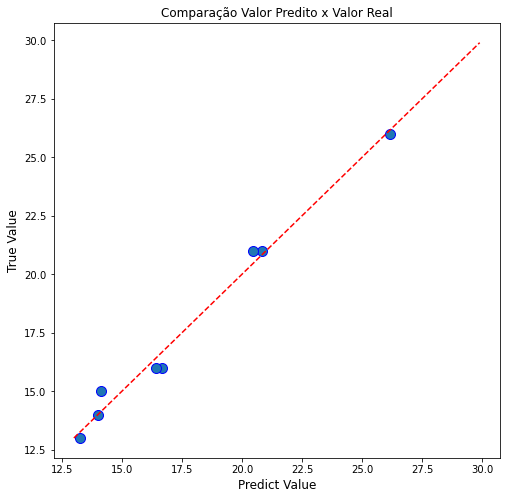

In [40]:
fig = plt.figure(figsize=(8,8))
l = plt.plot(y_pred, y, 'bo')
plt.setp(l, markersize=10)
plt.setp(l, markerfacecolor='C0')
plt.title('Comparação Valor Predito x Valor Real', fontsize=12)
plt.ylabel("True Value", fontsize=12)
plt.xlabel("Predict Value", fontsize=12)

# mostra a reta diagonal, que representa a predição perfeita
xl = np.arange(min(y), 1.2*max(y),(max(y)-min(y))/10)
yl = xl
plt.plot(xl, yl, 'r--')

plt.show()

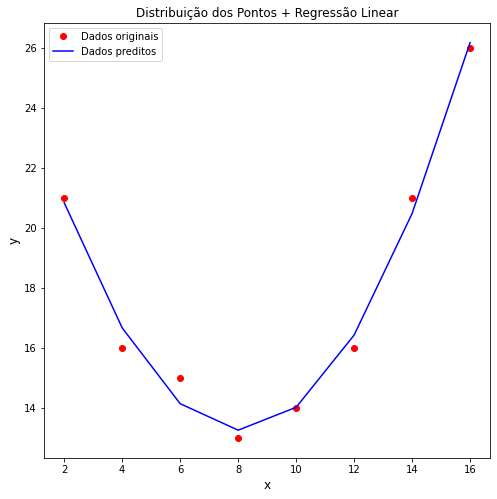

In [41]:
plt.figure(figsize=(8,8))
plt.plot(x,y, 'ro', label='Dados originais')
plt.plot(x,y_pred, 'b-', label = 'Dados preditos')
plt.title('Distribuição dos Pontos + Regressão Linear')
plt.ylabel("y", fontsize=12)
plt.xlabel("x", fontsize=12)
plt.legend()
plt.show()

In [6]:
#r2

## 

## Exercícios

__1)__ O arquivo fish.csv consiste em um dataset com registro de características de 7 espécies diferentes de peixes comuns nas vendas do mercado de peixes. Com este conjunto de dados, um modelo de Regressão Linear para estimar o peso (Weight) dos peixes.

Não esqueça de explorar os dados, realizar o tratamento dos dados (analise o tipo dos dados, por exemplo), fazer a separação dos dados de treino e teste; e, por fim, avaliar a precisão do seu modelo.

In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score


pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [44]:
fish = pd.read_csv('./datasets/fish.csv')

In [45]:
fish.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


## 

__2)__ Carregue os dados contidos no arquivo who-life-expectancy.csv (link abaixo), o qual contém diversas informações sobre os países do mundo inteiro, incluindo a expectativa de vida de sua população, entre os anos de 2000 e 2015. Seu objetivo é criar um modelo de Regressão Linear capaz de estimar a expectativa de vida da população de um país (em um determinado ano) dadas as demais informações sobre esse país.

Dica: Você deverá notar que esse dataset possui muitos dados ausentes (NaN), portanto, neste caso, será necessário realizar uma limpeza nos dados.

In [46]:
wle = pd.read_csv('./datasets/who-life-expectancy.csv')

In [47]:
wle.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,93,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,97,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


## 

__3)__ O arquivo usa_housing.csv consiste em um dataset que contém informações sobre o preço de casas em determinadas regiões dos Estados Unidos. Uma descrição das colunas desse dataframes é apresentada abaixo:

- __Avg. Area Income:__ Média da renda dos residentes de onde a casa está localizada.
- __Avg. Area House Age:__ Média de idade das casas da mesma cidade.
- __Avg. Area Number of Rooms:__ Número médio de quartos para casas na mesma cidade.
- __Avg. Area Number of Bedrooms:__ Número médio de quartos para casas na mesma cidade.
- __Area Population:__ A população da cidade onde a casa está localizada.
- __Price:__ Preço de venda da casa.
- __Address:__ Endereço da casa.

Utilize os dados contidos nele para criar um modelo de regressão linear que seja capaz de estimar o preço de venda das casas.

In [48]:
houses = pd.read_csv('./datasets/usa_housing.csv')

In [49]:
houses.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


## 

## Links, Artigos e Referências:

- [Scikit-Learn](https://scikit-learn.org/stable/index.html), Documentação do Scikit-Learn;
- [LinearRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html), Documentação da Regressão Linear;
- [Linear Regression - Detailed View](https://towardsdatascience.com/linear-regression-detailed-view-ea73175f6e86), artigo publicado pelo Towards Data Science.